In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
mrlco = pd.read_csv('mrl-1/progress.csv')
mrlco_2 = pd.read_csv('mrl-8/progress.csv')
mrlco_1 = pd.read_csv('mrl-9/progress.csv')
base = pd.read_csv('mrl-2/progress.csv')
diff = pd.read_csv('mrl-3/progress.csv')
same = pd.read_csv('mrl-6/progress.csv')

In [25]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

## Reward

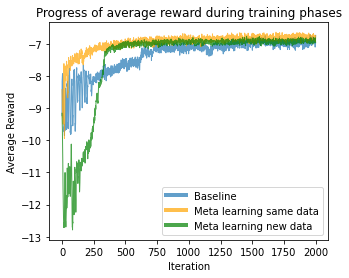

In [6]:
def fit_line(x, y, n, linspace=None):
    if linspace:
        return np.poly1d(np.polyfit(x, y, n))(linspace)
    return np.poly1d(np.polyfit(x, y, n))(x)

base_x = base['Itr']
base_y = base['Average reward']
base_fit = fit_line(base_x, base_y, 3)

same_x = same['Itr']
same_y = same['Average reward']
same_fit = fit_line(same_x, same_y, 3)

diff_x = diff['Itr']
diff_y = diff['Average reward']
diff_fit = fit_line(diff_x, diff_y, 3)

plt.figure(figsize=(5,4))
plt.tight_layout()
plt.plot(base['Itr'], base['Average reward'], linewidth=1, alpha=0.7, c='tab:blue', label='Baseline')
plt.plot(same['Itr'], same['Average reward'], linewidth=1, alpha=0.7, c='orange', label='Meta learning same data')
plt.plot(diff['Itr'], diff['Average reward'], linewidth=1, alpha=0.7, c='green', label='Meta learning new data')

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)

plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Progress of average reward during training phases')
plt.show()

## Return

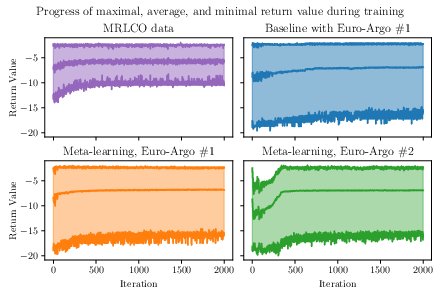

In [66]:
mrlco_avg = mrlco['AverageReturn']
mrlco_min = mrlco['MinReturn']
mrlco_max = mrlco['MaxReturn']

base_avg = base['AverageReturn']
base_min = base['MinReturn']
base_max = base['MaxReturn']

same_avg = same['AverageReturn']
same_min = same['MinReturn']
same_max = same['MaxReturn']

diff_avg = diff['AverageReturn']
diff_min = diff['MinReturn']
diff_max = diff['MaxReturn']


fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, constrained_layout=True, sharex=True, sharey=True)

ax1.set_title('MRLCO data')
ax1.plot(mrlco_x, mrlco_avg, c='tab:purple')
ax1.plot(mrlco_x, mrlco_min, c='tab:purple')
ax1.plot(mrlco_x, mrlco_max, c='tab:purple')
ax1.fill_between(mrlco_x, mrlco_min, mrlco_max, alpha=0.5, color='tab:purple')

ax2.set_title('Baseline with Euro-Argo \#1')
ax2.plot(base_x, base_avg, c='tab:blue')
ax2.plot(base_x, base_min, c='tab:blue')
ax2.plot(base_x, base_max, c='tab:blue')
ax2.fill_between(base_x, base_min, base_max, alpha=0.5, color='tab:blue')

ax3.set_title('Meta-learning, Euro-Argo \#1')
ax3.plot(same_x, same_avg, c='tab:orange')
ax3.plot(same_x, same_min, c='tab:orange')
ax3.plot(same_x, same_max, c='tab:orange')
ax3.fill_between(same_x, same_min, same_max, alpha=0.4, color='tab:orange')

ax4.set_title('Meta-learning, Euro-Argo \#2')
ax4.plot(diff_x, diff_avg, c='tab:green')
ax4.plot(diff_x, diff_min, c='tab:green')
ax4.plot(diff_x, diff_max, c='tab:green')
ax4.fill_between(diff_x, diff_min, diff_max, alpha=0.4, color='tab:green')

plt.setp([ax3, ax4], xlabel='Iteration')
plt.setp([ax1, ax3], ylabel='Return Value')
fig.suptitle('Progress of maximal, average, and minimal return value during training')
plt.savefig('four-returns.pgf')

## Execution Time

In [85]:
def exec_times(dataframes, names):
    means = pd.DataFrame(columns=('PolicyExecTime', 'EnvExecTime'))
    for name, dataframe in zip(names, dataframes):
        df = dataframe[['PolicyExecTime', 'EnvExecTime']].sum()
        df.name = name
        means = means.append(df)

    means['Total'] = means.sum(axis=1)
    return means

exec_times([mrlco, first, after], ['mrlco data', 'Euro-Argo log data', 'Euro-Argo log data after meta learning'])

,PolicyExecTime,EnvExecTime,Total
mrlco data,4955.190716,1906.546153,6861.736869
Euro-Argo log data,4970.863486,1906.830571,6877.694057
Euro-Argo log data after meta learning,5012.970695,1821.862364,6834.833059


In [133]:

fr = first['Average reward'].round(1)
ar = after['Average reward'].round(1)

m = np.max(fr)

print(fr.argmax())
print(m)

print(ar.tolist().index(m - 0.2))

print()

print(fr.tolist().index(-6.8))
print(ar.tolist().index(-6.8))

1955
-6.7
486

1345
920


In [64]:
total = 15311

base_reward = base['Average reward'].round(1)
same_reward = same['Average reward'].round(1)
diff_reward = diff['Average reward'].round(1)

print('base', base_reward.max(), base_reward.argmax())
print('same', same_reward.max(), same_reward.argmax())
print('diff', diff_reward.max(), diff_reward.argmax())

print(base_reward.tolist().index(-6.8))
print(same_reward.tolist().index(-6.8))
print(diff_reward.tolist().index(-6.8))

print(base_reward.iloc[-1])

base -6.7 1955
same -6.6 1686
diff -6.8 920
1345
521
920
-6.7


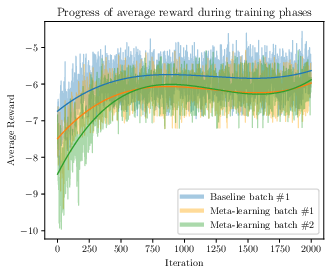

In [26]:
mrlco_x = mrlco['Itr']
mrlco_y = mrlco['Average reward']
mrlco_fit = fit_line(mrlco_x, mrlco_y, 3)

mrlco_2_x = mrlco_2['Itr']
mrlco_2_y = mrlco_2['Average reward']
mrlco_2_fit = fit_line(mrlco_2_x, mrlco_2_y, 3)

mrlco_1_x = mrlco_1['Itr']
mrlco_1_y = mrlco_1['Average reward']
mrlco_1_fit = fit_line(mrlco_1_x, mrlco_1_y, 3)

plt.figure(figsize=(5,4))
plt.tight_layout()
plt.plot(mrlco['Itr'], mrlco['Average reward'], linewidth=1, alpha=0.4, c='tab:blue', label='Baseline batch \#1')
plt.plot(mrlco_2['Itr'], mrlco_2['Average reward'], linewidth=1, alpha=0.4, c='orange', label='Meta-learning batch \#1')
plt.plot(mrlco_1['Itr'], mrlco_1['Average reward'], linewidth=1, alpha=0.4, c='tab:green', label='Meta-learning batch \#2')

plt.plot(mrlco['Itr'], mrlco_fit, linewidth=1, c='tab:blue')
plt.plot(mrlco_2['Itr'], mrlco_2_fit, linewidth=1, c='tab:orange')
plt.plot(mrlco_2['Itr'], mrlco_1_fit, linewidth=1, c='tab:green')

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)

plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Progress of average reward during training phases')
plt.savefig('mrlco-data.pgf')